In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [3]:
X = data.data
y = data.target

In [4]:
from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

svm_linear = SVC(kernel='linear', probability=True)
svm_linear.fit(X_train, y_train)

y_pred_linear = svm_linear.predict(X_test)

print("Linear SVM Accuracy:", accuracy_score(y_test, y_pred_linear))

Linear SVM Accuracy: 0.956140350877193


In [7]:
svm_rbf = SVC(kernel='rbf', probability=True)
svm_rbf.fit(X_train, y_train)

y_pred_rbf = svm_rbf.predict(X_test)

print("RBF SVM Accuracy:", accuracy_score(y_test, y_pred_rbf))

RBF SVM Accuracy: 0.9824561403508771


In [8]:
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(probability=True), param_grid, cv=5)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_

print("Best Parameters:", grid.best_params_)

Best Parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


In [9]:
y_pred = best_model.predict(X_test)

print("Final Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Final Accuracy: 0.9824561403508771

Confusion Matrix:
 [[41  2]
 [ 0 71]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



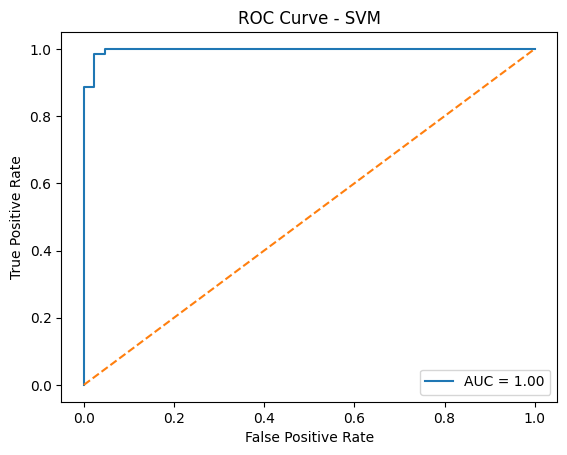

In [10]:
y_prob = best_model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM")
plt.legend()
plt.show()